In [1]:
# Import basis libraries
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.llm.starcoder import Starcoder

# Import Data - Cricket dataset

In [2]:
df = pd.read_csv("data/Cricket_data.csv")
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,NaN,1370350,Chennai Super Kings v Gujarat Titans,CSK v GT,"Qualifier 1 (N), Indian Premier League at Chen...",CSK,GT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1370351,Lucknow Super Giants v Mumbai Indians,LSG v MI,"Eliminator (N), Indian Premier League at Chenn...",LSG,MI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1370352,TBC v TBC,TBC v TBC,"Qualifier 2 (N), Indian Premier League at Ahme...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1370353,TBC v TBC,TBC v TBC,"Final (N), Indian Premier League at Ahmedabad,...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre


# Initialise LLM - PandasAI 

In [3]:
# Define List of Models
models = {"OpenAI": OpenAI, "Starcoder": Starcoder}

In [4]:
## Use below code to use HuggingFace LLM Models
model_to_run = 'Starcoder'
API_KEY = #'<API KEY>'

## Use below code to use OpenAI LLM Models
# model_to_run = 'OpenAI'
# API_KEY = '<API KEY>'

In [5]:
# Model Initialisation
llm = models[model_to_run](api_token=API_KEY) 
pandas_ai = PandasAI(llm, conversational=False, verbose=False) ## Use Verbose False if do not want to see the detailed output with pandas code

# Pandasai - Prompts

### Data preparation/Cleaning tasks

In [6]:
prompt = 'show the sample values from the columns home_runs?'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

527    154.0
547    226.0
541    192.0
872    152.0
687    116.0
Name: home_runs, dtype: float64


In [7]:
prompt = 'what are the dimensions of the data'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

(1032, 43)


In [8]:
prompt = 'what are the column and their data types?'
print(response)

(1032, 43)


In [9]:
prompt = 'count of rows where values are null'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

season               5
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             5
decision             5
1st_inning_score    13
2nd_inning_score    15
winner               1
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         5
away_captain         5
pom                 17
points              65
super_over           5
home_overs          13
home_runs           13
home_wickets        13
home_boundaries     13
away_overs          15
away_runs           15
away_wickets        15
away_boundaries     15
highlights          27
home_key_batsman    13
home_key_bowler     26
home_playx1          5
away_playx1          5
away_key_batsman    15
away_key_bowler     24
match_days           5
umpire1              5
umpire2              5
tv_umpire            7
referee              5
reserve_umpire      31
dtype: int6

In [10]:
## Replace null
prompt = 'replace null values with ""'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

      season       id                                          name  \
0             1370350          Chennai Super Kings v Gujarat Titans   
1             1370351         Lucknow Super Giants v Mumbai Indians   
2             1370352                                     TBC v TBC   
3             1370353                                     TBC v TBC   
4     2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   
...      ...      ...                                           ...   
1027  2008.0   336012  Royal Challengers Bangalore v Mumbai Indians   
1028  2008.0   336019            Kings XI Punjab v Rajasthan Royals   
1029  2008.0   336038           Delhi Daredevils v Rajasthan Royals   
1030  2008.0   336039         Chennai Super Kings v Kings XI Punjab   
1031  2008.0   336040        Chennai Super Kings v Rajasthan Royals   

      short_name                                        description home_team  \
0       CSK v GT  Qualifier 1 (N), Indian Premier League at Chen..

In [11]:
## testing with null replace ment worked
prompt = 'count of rows where values are null'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

season               5
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             5
decision             5
1st_inning_score    13
2nd_inning_score    15
winner               1
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         5
away_captain         5
pom                 17
points              65
super_over           5
home_overs          13
home_runs           13
home_wickets        13
home_boundaries     13
away_overs          15
away_runs           15
away_wickets        15
away_boundaries     15
highlights          27
home_key_batsman    13
home_key_bowler     26
home_playx1          5
away_playx1          5
away_key_batsman    15
away_key_bowler     24
match_days           5
umpire1              5
umpire2              5
tv_umpire            7
referee              5
reserve_umpire      31
dtype: int6

## Interesting insights - EDA

In [12]:
prompt = 'unique list of teams'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

['CSK' 'LSG' 'TBA' 'RCB' 'MI' 'KKR' 'DC' 'PBKS' 'SRH' 'GT' 'RR' 'KXIP'
 'RPS' 'GL' 'PWI' 'Kochi']


In [16]:
prompt = 'Plot a bar chart of total points per team'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)
print(response)

No code found in the response
Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



In [14]:
prompt = 'which team has won the toss the most?'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)

MI         131
SRH        124
DC         123
KKR        119
CSK        117
RCB        114
RR         109
KXIP        94
PWI         20
GT          18
GL          15
RPS         13
LSG         10
Kochi        8
no toss      7
PBKS         5
Name: toss_won, dtype: int64


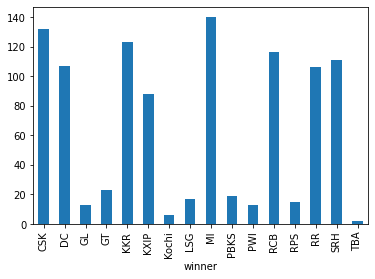

In [15]:
prompt = 'Plot win rates for each team?'
response = pandas_ai.run(df, prompt=prompt, is_conversational_answer=False)

print(response)